<a href="https://colab.research.google.com/github/bibek1997/DogsVsCats-Classifier/blob/master/dogsvscats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!KERAS_BACKEND=tensorflow python -c "from keras import backend"

Using TensorFlow backend.


In [0]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers

Using TensorFlow backend.


In [0]:
!pip install Pillow

In [0]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data1/train'
validation_data_dir = 'data1/validation'

In [0]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

Found 2048 images belonging to 2 classes.
Found 834 images belonging to 2 classes.


In [0]:
model = Sequential()
model.add(Conv2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
nb_epoch = 10
nb_train_samples = 2048
nb_validation_samples = 832

In [0]:
model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=2048, validation_data=<keras_pre..., validation_steps=832, epochs=10)`
  


Epoch 1/10
2048/2048 [==============================] - 157s 77ms/step - loss: 0.3439 - acc: 0.8336 - val_loss: 1.2114 - val_acc: 0.7243
Epoch 2/10
2048/2048 [==============================] - 154s 75ms/step - loss: 0.0816 - acc: 0.9754 - val_loss: 1.7821 - val_acc: 0.6848
Epoch 3/10
2048/2048 [==============================] - 152s 74ms/step - loss: 0.1269 - acc: 0.9669 - val_loss: 2.6290 - val_acc: 0.6916
Epoch 4/10
2048/2048 [==============================] - 154s 75ms/step - loss: 0.1690 - acc: 0.9584 - val_loss: 2.0641 - val_acc: 0.6993
Epoch 5/10
2048/2048 [==============================] - 154s 75ms/step - loss: 0.2184 - acc: 0.9428 - val_loss: 1.9060 - val_acc: 0.6893
Epoch 6/10
2048/2048 [==============================] - 153s 75ms/step - loss: 0.2749 - acc: 0.9285 - val_loss: 1.8682 - val_acc: 0.7121
Epoch 7/10
2048/2048 [==============================] - 153s 75ms/step - loss: 0.3515 - acc: 0.9026 - val_loss: 2.0032 - val_acc: 0.6934
Epoch 8/10
2048/2048 [===================

In [0]:
!unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: test/cat.jpg            
  inflating: test/cat4.jpg           
  inflating: test/cat2.jpg           
  inflating: test/cat1.jpg           


In [0]:
model.save_weights('basic_cnn_20_epochs.h5')

In [0]:
test_data_dir = 'test'

In [0]:
# automagically retrieve images and their classes for train and validation sets
test_generator = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

Found 0 images belonging to 0 classes.


In [0]:
rm -rf test

In [0]:
!unzip test.zip

Archive:  test.zip
   creating: test/
   creating: test/dogs/
   creating: test/cats/
  inflating: test/cats/cat.jpg       
  inflating: test/cats/cat4.jpg      
  inflating: test/cats/cat2.jpg      
  inflating: test/cats/cat1.jpg      


In [0]:
# automagically retrieve images and their classes for train and validation sets
test_generator = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

Found 4 images belonging to 2 classes.


In [0]:
nb_test_samples=4

In [0]:
model.evaluate_generator(validation_generator, nb_validation_samples)

[1.668311894977101, 0.7348408188682183]

In [0]:
model.evaluate_generator(test_generator, nb_test_samples)

[7.972764015197754, 0.5]

In [0]:
from keras.preprocessing import image
img = image.load_img("dog.jpeg", target_size=(224, 224))

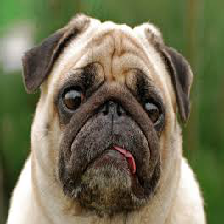

In [0]:
img